In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error

Load data

In [19]:
apps_data = pd.read_csv("../data/combined/combined_apps.csv")

Feature lists

In [20]:
numerical_features = ["size_mb", "update_freq_days", "anti_feature_score", "price_tier", "app_age_days", "reviews", "installs_clean"]
categorical_features = ["category", "platform", "content_rating"]
target = "rating"

# === Drop rows with missing values in target/features ===
apps_data = apps_data.dropna(subset=[target] + numerical_features + categorical_features)

X = apps_data[numerical_features + categorical_features]
y = apps_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Preprocessor

In [21]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

Gradient Boosting Pipeline

In [22]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

Train and Evaluate model

In [23]:
gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 0.52
R²: 0.11


Plot of feature importances

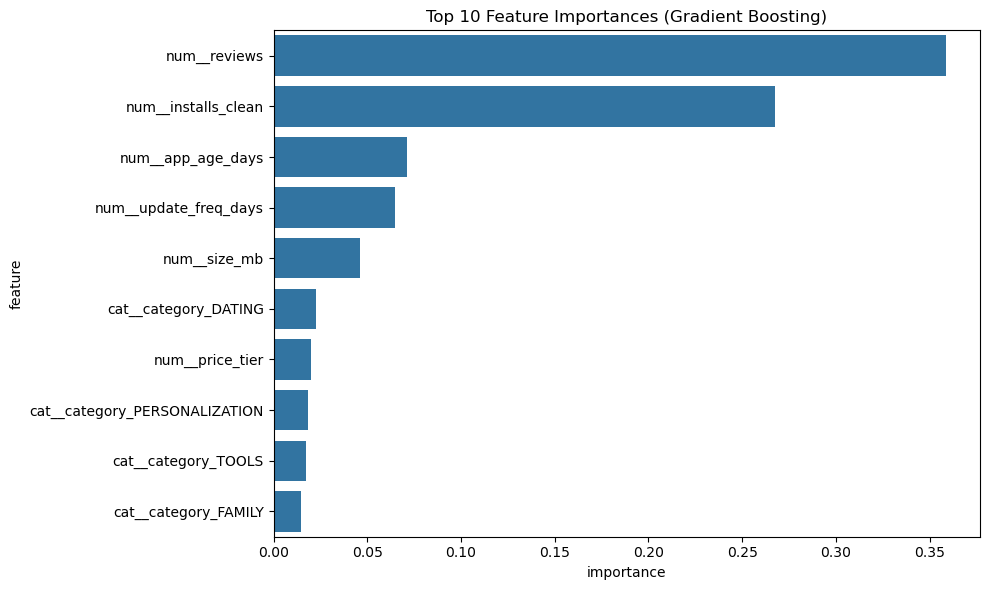

In [24]:
importances = gb_pipeline.named_steps["regressor"].feature_importances_
feature_names = gb_pipeline.named_steps["preprocessor"].get_feature_names_out()
feat_df = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feat_df.head(10))
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.tight_layout()
plt.show()

Metrics

In [25]:
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap="Greens")
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ValueError: continuous is not supported